In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### 1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc.

In [2]:
df = pd.read_csv('Laliga.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [3]:
df.columns = df.iloc[0]
df.drop(df.index[0],inplace=True)
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


### Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:

In [4]:
df.shape

(61, 20)

In [5]:
df.info()    # Datatype of all the columns is 'Object'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     object
 1   Team           61 non-null     object
 2   Seasons        61 non-null     object
 3   Points         61 non-null     object
 4   GamesPlayed    61 non-null     object
 5   GamesWon       61 non-null     object
 6   GamesDrawn     61 non-null     object
 7   GamesLost      61 non-null     object
 8   GoalsFor       61 non-null     object
 9   GoalsAgainst   61 non-null     object
 10  Champion       61 non-null     object
 11  Runner-up      61 non-null     object
 12  Third          61 non-null     object
 13  Fourth         61 non-null     object
 14  Fifth          61 non-null     object
 15  Sixth          61 non-null     object
 16  T              61 non-null     object
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

In [6]:
def fun(s):   # For removing '-' from all the columns
    list1 = s.split('-')
    return list1[0].strip()
new_df = pd.DataFrame()
for i in df.columns:
    new_df[i] = df[i].map(fun)
new_df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [7]:
new_df = new_df.replace({'':0})  # There are some null values present in the dataset which needs to be removed.
new_df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [8]:
numeric = new_df.iloc[:,2:]
numeric = numeric.astype(float)
for i in numeric.columns:
    new_df[i] = numeric[i]
new_df.info()   # Now we have converted the numerical values to 'Float'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            61 non-null     object 
 1   Team           61 non-null     object 
 2   Seasons        61 non-null     float64
 3   Points         61 non-null     float64
 4   GamesPlayed    61 non-null     float64
 5   GamesWon       61 non-null     float64
 6   GamesDrawn     61 non-null     float64
 7   GamesLost      61 non-null     float64
 8   GoalsFor       61 non-null     float64
 9   GoalsAgainst   61 non-null     float64
 10  Champion       61 non-null     float64
 11  Runner-up      61 non-null     float64
 12  Third          61 non-null     float64
 13  Fourth         61 non-null     float64
 14  Fifth          61 non-null     float64
 15  Sixth          61 non-null     float64
 16  T              61 non-null     float64
 17  Debut          61 non-null     float64
 18  Since/LastAp

### 1.	Which are the teams which started playing between 1930-1980?

In [9]:
teams = new_df[(new_df['Debut'] > 1930) & (new_df['Debut'] < 1980)]['Team']
teams

4                Valencia
6                 Sevilla
9                Zaragoza
10             Real Betis
11    Deportivo La Coruna
12             Celta Vigo
13             Valladolid
15         Sporting Gijon
16                Osasuna
17                 Malaga
18                 Oviedo
19               Mallorca
20             Las Palmas
22                Granada
23         Rayo Vallecano
24                  Elche
26               Hercules
27               Tenerife
28                 Murcia
30                Levante
31              Salamanca
32               Sabadell
33                  Cadiz
35              Castellon
38                Cordoba
40             Recreativo
41              Burgos CF
42             Pontevedra
47              Gimnastic
50               Alcoyano
51                   Jaen
53             AD Almeria
55                 Lleida
58                 Condal
59        Atletico Tetuan
60       Cultural Leonesa
Name: Team, dtype: object

In [10]:
teams.count()

36

### 2.	Which are the top 5 teams in terms of points?

In [29]:
top5 = new_df.nlargest(5,'Points')[['Team','Points']]
top5

,Team,Points
1,Real Madrid,4385.0
2,Barcelona,4262.0
3,Atletico Madrid,3442.0
4,Valencia,3386.0
5,Athletic Bilbao,3368.0


### 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

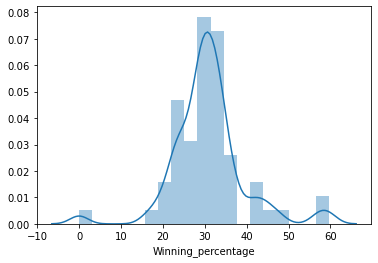

In [32]:
new_df['Winning_percentage'] = np.where(new_df['GamesPlayed']==0.0,0.0,round((new_df['GamesWon']/new_df['GamesPlayed'])*100,2))
sns.distplot(new_df['Winning_percentage'])
plt.show()

In [33]:
top5win = new_df.nlargest(5,'Winning_percentage')[['Team','Winning_percentage']]
top5win

,Team,Winning_percentage
1,Real Madrid,59.63
2,Barcelona,57.24
3,Atletico Madrid,47.48
4,Valencia,44.56
5,Athletic Bilbao,43.77


### 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

#### Null Hypothesis (H0) : there is no difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.
#### Alternate Hypothesis (H1) : there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [14]:
team1 = new_df[new_df['BestPosition'] <= 3]['Winning_percentage']
team2 = new_df[(new_df['BestPosition'] > 3) & (new_df['BestPosition'] <= 7)]['Winning_percentage']

As we have two samples(team1 and team2) here and both are independent, We have to do two sample independent test.

In [15]:
#test of normality
stats.shapiro(team1)

ShapiroResult(statistic=0.8252524733543396, pvalue=0.003532945876941085)

In [16]:
#test of normality
stats.shapiro(team2)

ShapiroResult(statistic=0.9436671733856201, pvalue=0.2809881269931793)

As the P-value of 'Team1' is less than 0.05 , we have to do non-parametric test.

In [17]:
stats.mannwhitneyu(team1,team2)

MannwhitneyuResult(statistic=11.0, pvalue=4.1876636593687686e-07)

#### As the P-value(4.1876636593687686x10^-07) is very much less than 0.05(95% significance level) so we reject the null hypothesis and accept the alternate hypothesis i.e. there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

-------------------------------

### 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

In [18]:
n = 200
xbar = 140
s = 25

### a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [19]:
se = s/np.sqrt(n)
print(se)

1.7677669529663687


The standard error of the sample mean indicates how far the sample mean is from the population mean. Here the standard error value is 1.76 i.e. we can say that the population mean is in the range of (140+1.76) and (140-1.76)

### b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma

In [20]:
cl = 0.95
t_alpha = stats.t.isf((1-cl)/2,n-1)
ll = xbar - (t_alpha*se)
ul = xbar + (t_alpha*se)
print('The true mean range is in between',ll,'and',ul)

The true mean range is in between 136.51404038839016 and 143.48595961160984


### c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [21]:
cl = 0.95
n1 = 100
se1 = s/np.sqrt(n1)
t_alpha1 = stats.t.isf((1-cl)/2,n1-1)
ll1 = xbar - (t_alpha1*se1)
ul1 = xbar + (t_alpha1*se1)
print('The true mean range is in between',ll1,'and',ul1)

The true mean range is in between 135.03945762122828 and 144.96054237877172


### d)	Which of the two above intervals are wider?

In [22]:
range1 = (ul - ll)
range2 = (ul1 - ll1)
print('For sample size 200, the interval is',range1,'wide and for sample size 100, the interval is',range2,'wide')

For sample size 200, the interval is 6.971919223219686 wide and for sample size 100, the interval is 9.92108475754344 wide


So for sample size 100, the interval is wider than for the sample size 200

### e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

As we know, estimated standard error of a sample gives us the idea , how far the sample mean is from the population mean. So when we increase the sample size , the value of the estimated standard error decreases, because we are taking more samples from population and it helps us to find the population mean more accurately within a shorter range. So That's why, when we increase the sample size, estimated standard error decreases.

In techincal term, the formula of estimated standard error of sample mean = sample standard deviaton / square root(sample size).
So it is obvious from the formula that with the increasing sample size, estimated standard error of sample mean decreases i.e. they are inversely proportional to each other.

------------------------------------

### 3. Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

### One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [23]:
df = pd.read_csv('Golf.csv')
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [24]:
df.shape

(40, 2)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Current  40 non-null     int64
 1   New      40 non-null     int64
dtypes: int64(2)
memory usage: 768.0 bytes


In [26]:
df.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


### 1.	Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

#### Null Hypothesis (H0) : population mean of distance covered by current balls = population mean of distance covered by new balls
#### Alternate Hypothesis (H1) : population mean of distance covered by current balls != population mean of distance covered by new balls

### 2.	Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [27]:
current = df['Current']
new = df['New']
statistic,pvalue = stats.ttest_rel(current,new)
print('Statistic value =',statistic)
print('P-value =',pvalue)

Statistic value = 1.2769699827911767
P-value = 0.20916361823147053


As the P-value(0.20916361823147053) is greater than 0.05 (95% confidence level) , we will accept the null hypothesis i.e. population mean of distance covered by current balls = population mean of distance covered by new balls.
So, Par Inc. should go for new balls.

### 3.	What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [28]:
cl = 0.95
n1 = len(current)
n2 = len(new)
xbar1 = current.mean()
xbar2 = new.mean()
s1 = current.std(ddof = 1)
s2 = new.std(ddof = 1)
se1 = s1/np.sqrt(n1)
se2 = s2/np.sqrt(n2)
tcrit1 = stats.t.isf((1-cl)/2,n1-1)
tcrit2 = stats.t.isf((1-cl)/2,n2-1)
ll1 = xbar1 - tcrit1*se1
ul1 = xbar1 + tcrit1*se1
ll2 = xbar2 - tcrit2*se2
ul2 = xbar2 + tcrit2*se2
print('The Population mean distance interval for current balls is in between',ll1,'and',ul1)
print('The Population mean distance interval for new balls is in between',ll2,'and',ul2)
diff = current - new
xbar = diff.mean()
s = diff.std(ddof = 1)
n = len(diff)
se = s/np.sqrt(n)
tcrit = stats.t.isf((1-cl)/2,n-1)
ll = xbar - tcrit*se
ul = xbar + tcrit*se
print('The difference between the means of the two population interval is in between',ll,'and',ul)

The Population mean distance interval for current balls is in between 267.47565965314044 and 273.0743403468595
The Population mean distance interval for new balls is in between 264.33481641038986 and 270.66518358961014
The difference between the means of the two population interval is in between -1.620535804056375 and 7.1705358040563745


So here we can see the interval of population mean distance of current balls and the new balls is in the range of the difference between the means of the two population interval so we are advising Par Inc. to go for new balls.